# MODUL PRAKTIKUM 4 AST: ANALISIS DATA PEMERINTAHAN

In [23]:
# Aktifkan beberapa library
import numpy as np
import pandas as pd
import matplotlib
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Membaca dataset Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta Tahun 2010-2030 dari 5 Stasiun Pemantau Kualitas Udara (SPKU)
df = pd.read_csv("group by ISPU DKI Jakarta 2010-2030.csv")
df

,tahun,pm10,so2,co,o3,no2
0,2010,52.756164,13.263014,35.509589,50.375342,18.178082
1,2011,76.704110,17.468493,29.813699,89.161644,17.663014
2,2012,78.243169,25.352459,37.071038,152.218579,18.658470
3,2013,66.202740,20.849315,36.008219,116.120548,18.178082
4,2014,67.347945,14.164384,33.849315,90.246575,18.449315
5,2015,71.150685,23.715068,33.493151,73.336986,18.720548
6,2016,63.071038,30.803279,43.551913,82.751366,15.215847
7,2017,59.128767,43.931507,36.046575,83.923288,15.134247
8,2018,62.665753,30.860274,24.158904,118.942466,15.863014
9,2019,65.567123,28.271233,25.016438,112.830137,15.200000


# 2. CLUSTERING

## 2a. K-MEANS Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [26]:
df_cluster = df.drop(columns = ['tahun'])

In [27]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_cluster)

C:\Users\bayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [28]:
k_means_labels = model.fit_predict(df_cluster)
k_means_labels

C:\Users\bayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 3, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2])

In [29]:
df['cluster KMeans'] = k_means_labels
df

,tahun,pm10,so2,co,o3,no2,cluster KMeans
0,2010,52.756164,13.263014,35.509589,50.375342,18.178082,2
1,2011,76.704110,17.468493,29.813699,89.161644,17.663014,2
2,2012,78.243169,25.352459,37.071038,152.218579,18.658470,3
3,2013,66.202740,20.849315,36.008219,116.120548,18.178082,1
4,2014,67.347945,14.164384,33.849315,90.246575,18.449315,2
5,2015,71.150685,23.715068,33.493151,73.336986,18.720548,2
6,2016,63.071038,30.803279,43.551913,82.751366,15.215847,2
7,2017,59.128767,43.931507,36.046575,83.923288,15.134247,2
8,2018,62.665753,30.860274,24.158904,118.942466,15.863014,1
9,2019,65.567123,28.271233,25.016438,112.830137,15.200000,1


In [30]:
centroids  = model.cluster_centers_  
print(centroids)

[[ 60.49725275  52.75549451  15.31318681  49.84065934  33.76648352]
 [ 65.20592806  28.10963885  29.73770738 114.24036867  17.32554113]
 [ 64.98663348  26.8147089   31.90001887  81.04255468  16.15339314]
 [ 78.2431694   25.35245902  37.07103825 152.2185792   18.65846995]]


## 2b. Hierarchical Clustering

In [31]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0) # each point starts as its own cluster

In [32]:
cluster_labels = model.fit_predict(df_cluster)
cluster_labels # each point gets its own label since distance_threshold=0 in the above cell

array([19, 14, 15, 11, 13, 17, 16, 10, 18,  7, 12,  5,  6,  2,  8, 20,  9,
        3,  4,  1,  0], dtype=int64)

In [33]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5] # display only 5 rows
# format: point 1, point 2, distance between the points, number of points in the cluster

array([[ 4.        ,  8.        ,  1.41421356,  2.        ],
       [ 3.        ,  5.        ,  1.41421356,  2.        ],
       [11.        , 12.        ,  1.41421356,  2.        ],
       [18.        , 19.        ,  2.82842712,  2.        ],
       [ 0.        ,  1.        ,  3.16227766,  2.        ]])

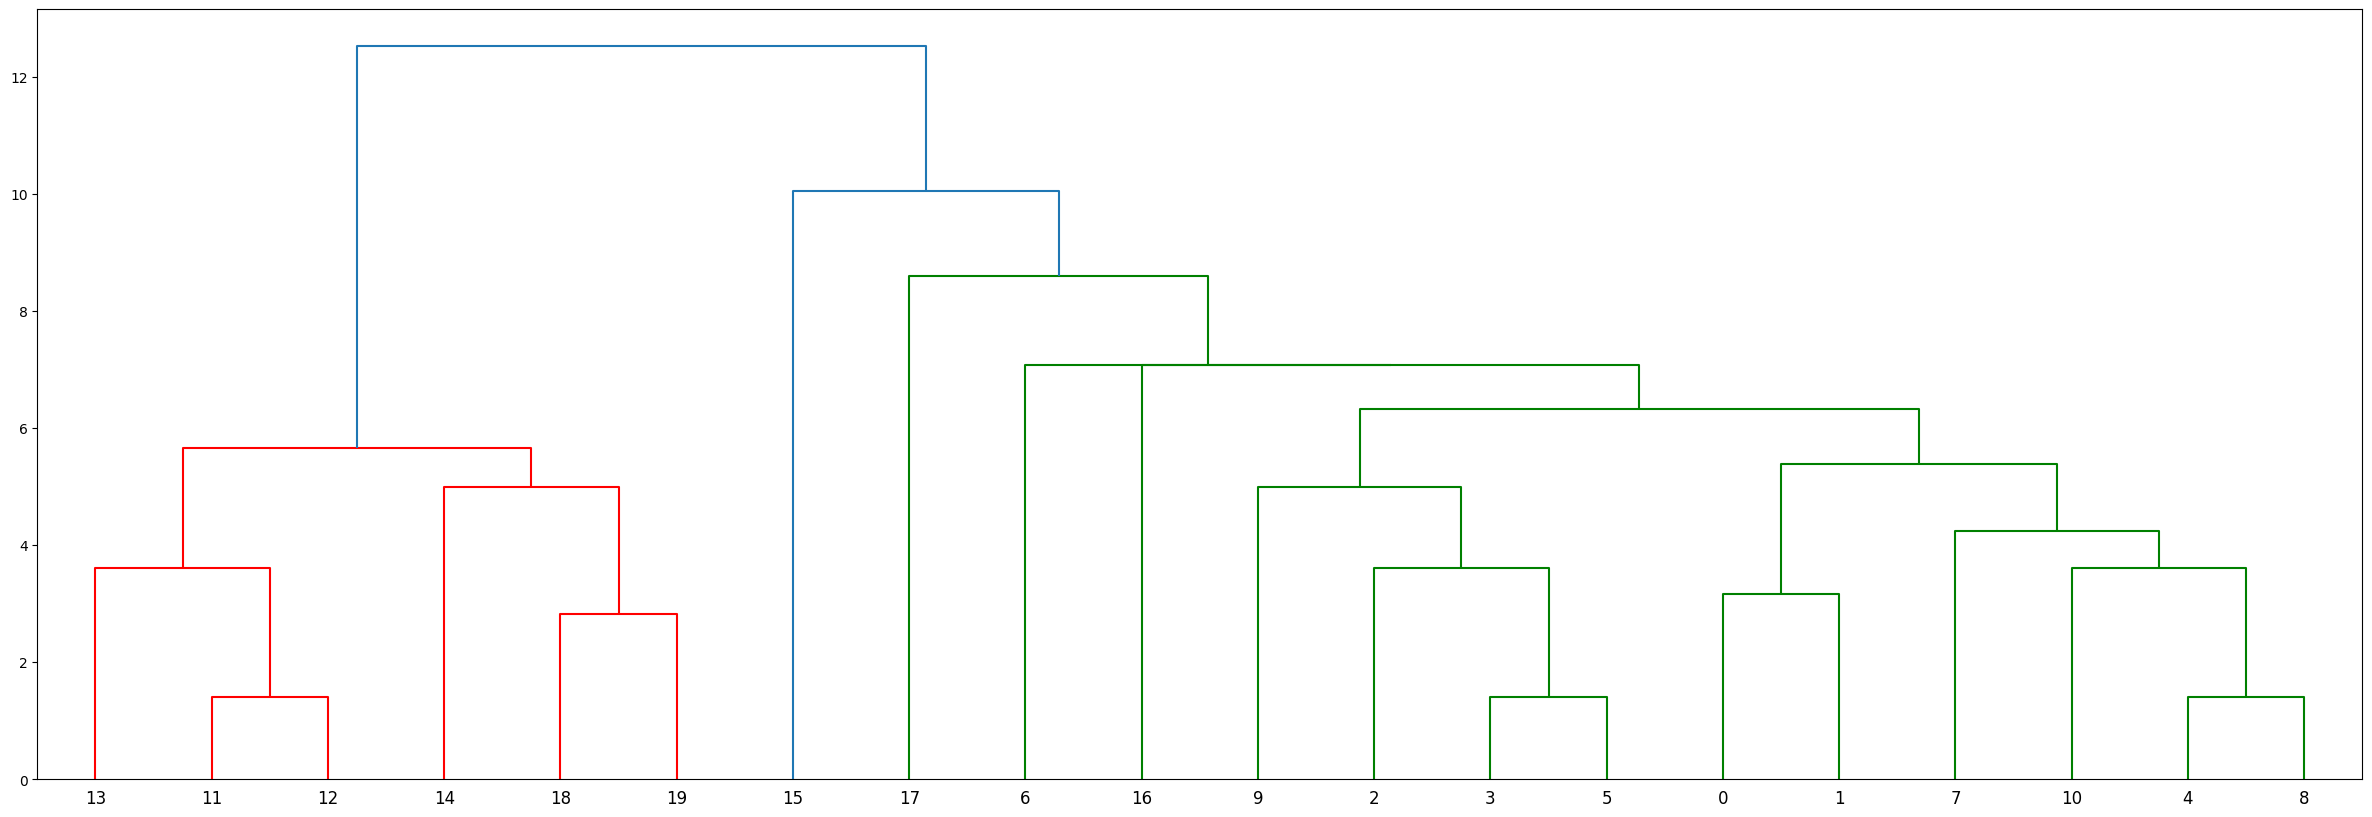

In [34]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','g','b']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=20, color_threshold=10) # color_threshold=10 sets clusters below y-axis value of 10 to be of the same color

In [35]:
model1 = AgglomerativeClustering(n_clusters=4)

In [36]:
cluster_aglo = model1.fit_predict(df_cluster) # predict the categories for each point.
cluster_aglo

array([0, 2, 3, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2],
      dtype=int64)

In [37]:
df['cluster Agglo'] = cluster_aglo
df

,tahun,pm10,so2,co,o3,no2,cluster KMeans,cluster Agglo
0,2010,52.756164,13.263014,35.509589,50.375342,18.178082,2,0
1,2011,76.704110,17.468493,29.813699,89.161644,17.663014,2,2
2,2012,78.243169,25.352459,37.071038,152.218579,18.658470,3,3
3,2013,66.202740,20.849315,36.008219,116.120548,18.178082,1,1
4,2014,67.347945,14.164384,33.849315,90.246575,18.449315,2,2
5,2015,71.150685,23.715068,33.493151,73.336986,18.720548,2,2
6,2016,63.071038,30.803279,43.551913,82.751366,15.215847,2,2
7,2017,59.128767,43.931507,36.046575,83.923288,15.134247,2,2
8,2018,62.665753,30.860274,24.158904,118.942466,15.863014,1,1
9,2019,65.567123,28.271233,25.016438,112.830137,15.200000,1,1


# Hitungan penentuan cluster

In [38]:
#Hitung centroid K-Means
centroid_kmeans = df.groupby('cluster KMeans', as_index=False)['pm10','so2','co','o3','no2'].mean()
centroid_kmeans

C:\Users\bayuk\AppData\Local\Temp\ipykernel_17124\2840522178.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroid_kmeans = df.groupby('cluster KMeans', as_index=False)['pm10','so2','co','o3','no2'].mean()


,cluster KMeans,pm10,so2,co,o3,no2
0,0,60.497253,52.755495,15.313187,49.840659,33.766484
1,1,65.205928,28.109639,29.737707,114.240369,17.325541
2,2,64.986633,26.814709,31.900019,81.042555,16.153393
3,3,78.243169,25.352459,37.071038,152.218579,18.658470


In [39]:
#Hitung centroid Hierarchical (Agglo)
centroid_kmeans = df.groupby('cluster Agglo', as_index=False)['pm10','so2','co','o3','no2'].mean()
centroid_kmeans

C:\Users\bayuk\AppData\Local\Temp\ipykernel_17124\2891351477.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroid_kmeans = df.groupby('cluster Agglo', as_index=False)['pm10','so2','co','o3','no2'].mean()


,cluster Agglo,pm10,so2,co,o3,no2
0,0,56.626709,33.009254,25.411388,50.108001,25.972283
1,1,65.205928,28.109639,29.737707,114.240369,17.325541
2,2,66.098494,28.046681,31.571876,83.830483,15.969331
3,3,78.243169,25.352459,37.071038,152.218579,18.658470


In [40]:
def f1(row):
    if row['cluster KMeans'] == 0:
        val = 1
    elif row['cluster KMeans'] == 2:
        val = 2
    elif row['cluster KMeans'] == 1:
        val = 3
    else:
        val = 4
    return val

In [41]:
df['klas_KMeans'] = df.apply(f1, axis=1)
df

,tahun,pm10,so2,co,o3,no2,cluster KMeans,cluster Agglo,klas_KMeans
0,2010,52.756164,13.263014,35.509589,50.375342,18.178082,2,0,2
1,2011,76.704110,17.468493,29.813699,89.161644,17.663014,2,2,2
2,2012,78.243169,25.352459,37.071038,152.218579,18.658470,3,3,4
3,2013,66.202740,20.849315,36.008219,116.120548,18.178082,1,1,3
4,2014,67.347945,14.164384,33.849315,90.246575,18.449315,2,2,2
5,2015,71.150685,23.715068,33.493151,73.336986,18.720548,2,2,2
6,2016,63.071038,30.803279,43.551913,82.751366,15.215847,2,2,2
7,2017,59.128767,43.931507,36.046575,83.923288,15.134247,2,2,2
8,2018,62.665753,30.860274,24.158904,118.942466,15.863014,1,1,3
9,2019,65.567123,28.271233,25.016438,112.830137,15.200000,1,1,3


In [42]:
def f1(row):
    if row['cluster Agglo'] == 0:
        val = 1
    elif row['cluster Agglo'] == 2:
        val = 2
    elif row['cluster Agglo'] == 1:
        val = 3
    else:
        val = 4
    return val

In [43]:
df['klas_Agglo'] = df.apply(f1, axis=1)
df

,tahun,pm10,so2,co,o3,no2,cluster KMeans,cluster Agglo,klas_KMeans,klas_Agglo
0,2010,52.756164,13.263014,35.509589,50.375342,18.178082,2,0,2,1
1,2011,76.704110,17.468493,29.813699,89.161644,17.663014,2,2,2,2
2,2012,78.243169,25.352459,37.071038,152.218579,18.658470,3,3,4,4
3,2013,66.202740,20.849315,36.008219,116.120548,18.178082,1,1,3,3
4,2014,67.347945,14.164384,33.849315,90.246575,18.449315,2,2,2,2
5,2015,71.150685,23.715068,33.493151,73.336986,18.720548,2,2,2,2
6,2016,63.071038,30.803279,43.551913,82.751366,15.215847,2,2,2,2
7,2017,59.128767,43.931507,36.046575,83.923288,15.134247,2,2,2,2
8,2018,62.665753,30.860274,24.158904,118.942466,15.863014,1,1,3,3
9,2019,65.567123,28.271233,25.016438,112.830137,15.200000,1,1,3,3


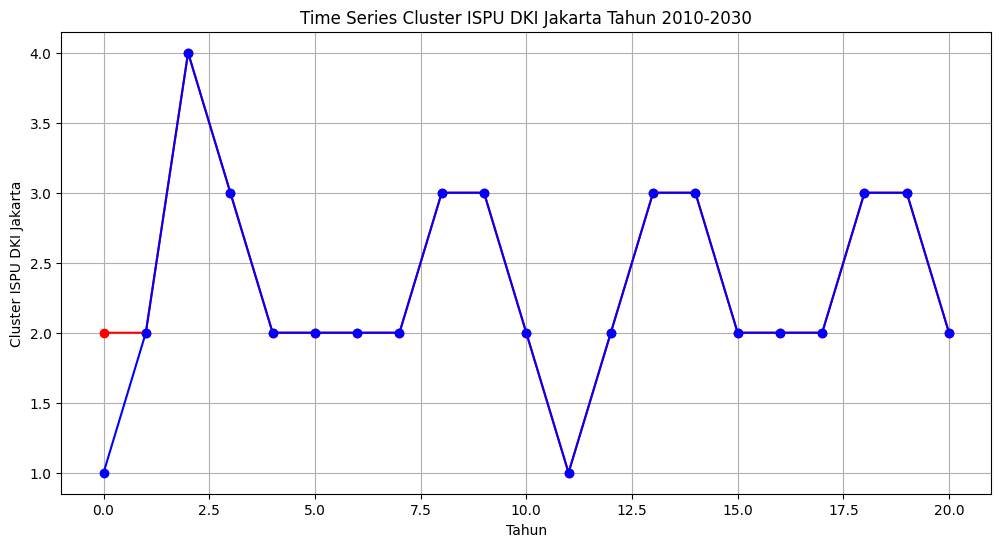

In [44]:
# Menggambar time series plot 
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['klas_KMeans'], marker='o', linestyle='-', color='r')
plt.plot(df.index, df['klas_Agglo'], marker='o', linestyle='-', color='b')
plt.title('Time Series Cluster ISPU DKI Jakarta Tahun 2010-2030')
plt.xlabel('Tahun')
plt.ylabel('Cluster ISPU DKI Jakarta')
plt.grid(True)
plt.show()

In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from tabulate import tabulate

# Hitung Silhouette Score
silhouette_kmeans = silhouette_score(df_cluster, k_means_labels)
silhouette_agglo = silhouette_score(df_cluster, cluster_aglo)

# Menghitung metrik Calinski-Harabasz Index
calinski_kmeans = calinski_harabasz_score(df_cluster, k_means_labels)
calinski_agglo = calinski_harabasz_score(df_cluster, cluster_aglo)

# Menyusun data dalam bentuk tabel
results = {
    "Clustering Algorithm": ["K-Means", "Agglomerative"],
    "Silhouette Score": [silhouette_kmeans, silhouette_agglo],
    "Calinski-Harabasz Index": [calinski_kmeans, calinski_agglo]
}

df_results = pd.DataFrame(results)

# Cetak tabel dengan garis
print("Evaluasi Clustering")
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

Evaluasi Clustering
╒════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│    │ Clustering Algorithm   │   Silhouette Score │   Calinski-Harabasz Index │
╞════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│  0 │ K-Means                │           0.385946 │                   15.5855 │
├────┼────────────────────────┼────────────────────┼───────────────────────────┤
│  1 │ Agglomerative          │           0.399117 │                   17.0505 │
╘════╧════════════════════════╧════════════════════╧═══════════════════════════╛


In [ ]:
df.to_csv('Hasil Cluster ISPU DKI Jakarta 2010-2030.csv',index=False)